Import Libraries and Load Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#dataset Load the 
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 Data Preprocessing

In [2]:
# Select relevant columns
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

# Convert labels to binary (0 for ham, 1 for spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

Text Vectorization (TF-IDF)

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Model Selection and Training

In [4]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

Model Evaluation

In [5]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Interpretation and Further Analysis

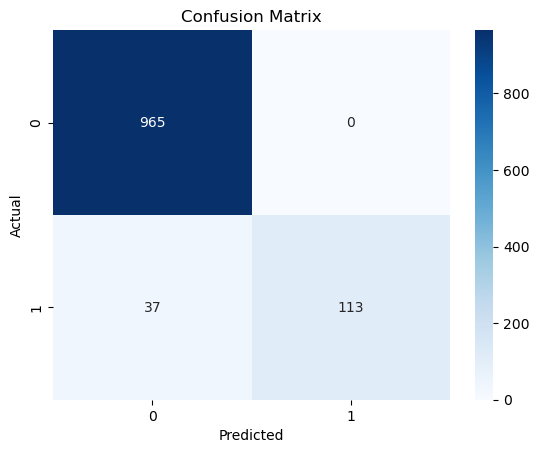

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
misclassified_examples = X_test[y_test != y_pred]
misclassified_actual_labels = y_test[y_test != y_pred]
misclassified_predicted_labels = y_pred[y_test != y_pred]

for i in range(min(5, len(misclassified_examples))):
    print("Predicted:", misclassified_predicted_labels[i])
    print("Actual:", misclassified_actual_labels.iloc[i])
    print("Message:", misclassified_examples.iloc[i])
    print()

Predicted: 0
Actual: 1
Message: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p

Predicted: 0
Actual: 1
Message: Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+

Predicted: 0
Actual: 1
Message: Loans for any purpose even if you have Bad Credit! Tenants Welcome. Call NoWorriesLoans.com on 08717111821

Predicted: 0
Actual: 1
Message: ringtoneking 84484

Predicted: 0
Actual: 1
Message: U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094594



Advanced Text Preprocessing

In [8]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
text_data = data['v2']  # Assuming 'v2' is the column name containing the text data

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define a function for tokenization and lemmatization using spaCy
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return " ".join(tokens)

# Apply preprocessing to the text data
preprocessed_text_data = [preprocess_text(text) for text in text_data]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Convert preprocessed text to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text_data)

# Optional: Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

    00  000  008704050406  01223585334   02  0207  02073162414  021   03   04  \
0  0.0  0.0           0.0          0.0  0.0   0.0          0.0  0.0  0.0  0.0   
1  0.0  0.0           0.0          0.0  0.0   0.0          0.0  0.0  0.0  0.0   
2  0.0  0.0           0.0          0.0  0.0   0.0          0.0  0.0  0.0  0.0   
3  0.0  0.0           0.0          0.0  0.0   0.0          0.0  0.0  0.0  0.0   
4  0.0  0.0           0.0          0.0  0.0   0.0          0.0  0.0  0.0  0.0   

   ...   ìä   ìï   ó_  û_thank  ûªm  ûªt  ûªve   ûï  ûïharry   ûò  
0  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0  
1  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0  
2  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0  
3  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0  
4  ...  0.0  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0  

[5 rows x 5000 columns]


Ensemble Methods

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Preprocessing
text_data = data['v2']
labels = data['v1']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [11]:
# Ensemble Method: Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9757847533632287


In [12]:
# Ensemble Method: AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("AdaBoost Accuracy:", accuracy_ab)

AdaBoost Accuracy: 0.967713004484305


Comparison

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')

# Preprocessing
text_data = data['v2']
labels = data['v1']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [15]:
# Ensemble Method: Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [16]:
# Ensemble Method: AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

In [17]:
# Compare Accuracies
print("Random Forest Accuracy:", accuracy_rf)
print("AdaBoost Accuracy:", accuracy_ab)

Random Forest Accuracy: 0.9757847533632287
AdaBoost Accuracy: 0.967713004484305


In [18]:
# Display comparison
if accuracy_rf > accuracy_ab:
    print("Random Forest performs better.")
elif accuracy_ab > accuracy_rf:
    print("AdaBoost performs better.")
else:
    print("Both methods have the same accuracy.")

Random Forest performs better.
